In [4]:
# Skewness
# skewness: a measure of asymmetry around the mean, it is 0 for an ND
# skewness = 0 means that values at the edges of the distribution are equally likely

# Positive Skeewnes:
# A right-skewed distribution shows many outliers with values larger than the mean.
# These outliers greatly affect the mean value as they shift it considerably to the right of the median value.
# An example is the distribution of incomes. 
# Income is floored at ZERO on the left as there cannot be negative values of income. 
# However, there is no upper limit to the possible values of incomes, thus this specific distribution will be right-skewed

# Negative Skeewnes:
# A left-skewed distribution shows many outliers with values smaller than the mean.
# These outliers greatly affect the mean value as they shift it considerably to the left of the median value.
# An example is the distribution of losses caused by storms. 
# The large majority of storms cause little or no losses.
# Occasionally a large storm may cause great losses.
# In this example the mean value will shift to the left of the median.
# Losses that are caused by storms have an upper bound of zero and no lower bound.

In [ ]:
# Kurtosis
# Kurtosis is a measure of the frequency of outliers.
# ND have a kurtosis of 3.
# Excess kurtosis = kurtosis - 3
# A distribution with Kurtosis larger than 3 is a distribution in which outliers are more likely than the outliers of a ND

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

In [22]:
sp_data = pd.read_csv('datasets/SP_500_1987.csv')
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,31-Dec-1986,243.37,244.03,241.28,242.17,242.17,"13,92,00,000"
1,2-Jan-1987,242.17,246.45,242.17,246.45,246.45,"9,18,80,000"
2,5-Jan-1987,246.45,252.57,246.45,252.19,252.19,"18,19,00,000"
3,6-Jan-1987,252.20,253.99,252.14,252.78,252.78,"18,93,00,000"
4,7-Jan-1987,252.78,255.72,252.65,255.33,255.33,"19,09,00,000"


In [7]:
sp_data.describe()

,Open,High,Low,Close,AdjClose
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,286.964466,289.328063,284.412095,286.978617,286.978617
std,28.923683,28.241142,29.535528,28.889053,28.889053
min,223.980000,225.770000,216.460000,223.920000,223.920000
25%,267.840000,270.400000,264.310000,267.840000,267.840000
50%,290.520000,292.470000,288.340000,290.520000,290.520000
75%,308.940000,310.270000,307.420000,308.960000,308.960000
max,336.770000,337.890000,334.460000,336.770000,336.770000


In [23]:
sp_data.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
AdjClose    float64
Volume       object
dtype: object

In [25]:
# The DS has the column Date of type Object
# We want to convert all the data in the Date column of the DS to the DateTime type
sp_data['Date']

# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# https://stackoverflow.com/questions/47556976/representing-date-format-for-three-letter-month-in-python
# sp_data['Date'] = pd.to_datetime(sp_data['Date'], format='%d-%m-%Y')
sp_data['Date'] = pd.to_datetime(sp_data['Date'], format='%d-%b-%Y')

# The data file had to be edited as there were dates such as 01-Dec-1990 mixed with dates as 01-April-1990
# All the entries with a format different from format='%d-%b-%Y' were corrected.

In [26]:
sp_data['Date']

0     1986-12-31
1     1987-01-02
2     1987-01-05
3     1987-01-06
4     1987-01-07
         ...    
248   1987-12-23
249   1987-12-24
250   1987-12-28
251   1987-12-29
252   1987-12-30
Name: Date, Length: 253, dtype: datetime64[ns]

In [27]:
sp_data.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
AdjClose           float64
Volume              object
dtype: object

C:\Users\pb00270\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pb00270\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'S&P 500 1987')

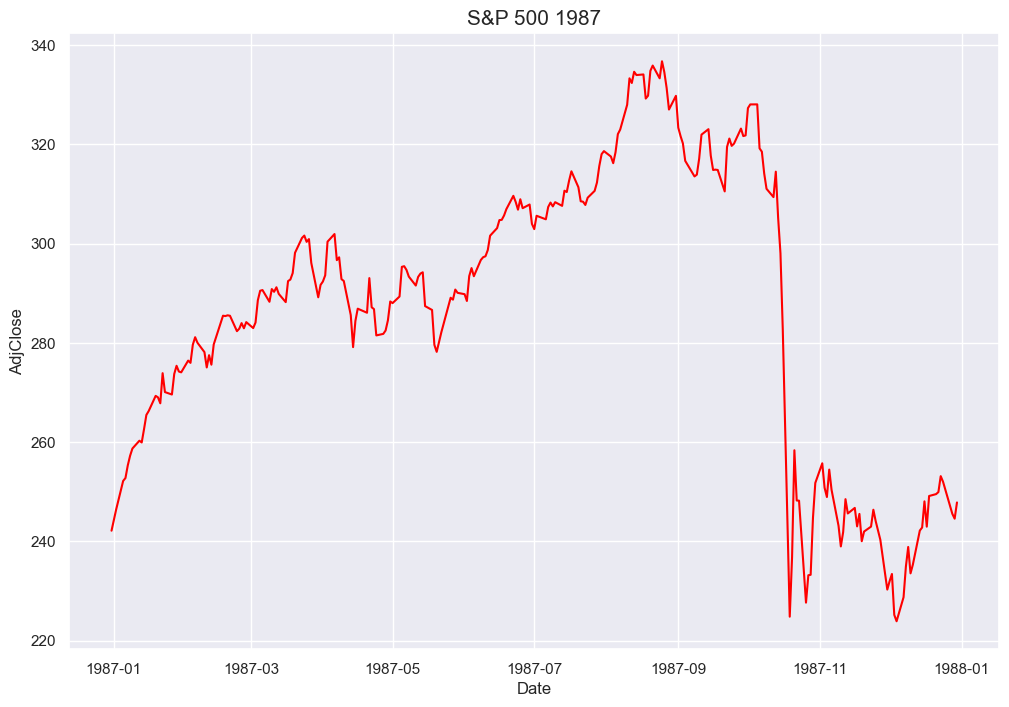

In [30]:
plt.figure(figsize=(12,8))
sns.lineplot(data=sp_data, x='Date', y='AdjClose', color='red')
plt.title('S&P 500 1987', fontsize='15')